<a href="https://colab.research.google.com/github/abdisheikh94/dsc-project1/blob/master/dsc_phase1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Data Analysis of Aircraft Incidents for Business Strategy Minimizing Risk

## Overview

In this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help guide safer aircraft purchases.
Using Python and pandas, I cleaned and explored the data, focusing on trends in manufacturer safety, injury severity, and number of engines.
The analysis showed that aircraft from certain manufacturers and those with fewer engines tend to be involved in fewer and less severe accidents.
These insights informed three business recommendations to support data-driven decisions as the company enters the aviation industry.

## Business Understanding

The business problem focuses on minimizing risk as the company expands into aviation by purchasing aircraft for commercial and private use.
To support safe investment decisions, I analyzed historical accident data to identify manufacturers with fewer incidents, aircraft with fewer engines, and models linked to less severe outcomes.
These factors directly impact safety, operational costs, and reputation, helping the company make informed, low-risk purchasing choices.

## Data Understanding

The dataset comes from the NTSB and contains records of civil aviation accidents from 1962 to 2023, including aircraft manufacturer, model, number of engines, location, and injury severity.
It reflects the safety history of different aircraft, which is critical for evaluating investment risks in aviation.
The analysis focuses on accident severity as the target variable, using both categorical and numerical data to uncover safety trends.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/AviationData.csv', encoding='latin1')

# Preview first few rows
df.head()

<ipython-input-1-731a81ef93c1>:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The dataset contains accident reports from 1962 to 2023, including fields like aircraft manufacturer, model, number of engines in the aircraft, and injury severity. The target focus is on accident severity and safety trends among manufacturers and aircraft types.


## Basic information about the dataset

In [2]:
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make               

## Displaying the number of rows and columns

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (88889, 31)


## Statistical Summary

In [4]:
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


## Data Preparation

I cleaned the dataset by dropping irrelevant columns, handling missing values through removal or forward-filling, and standardizing categorical data. These steps ensured the dataset was reliable and focused on key factors related to aircraft safety and risk assessment.

## Checking for missing values

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)


Missing Values:
 Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64


### Dropping columns with more than 30% missing values

In [6]:
threshold = len(df) * 0.3
cols_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=cols_to_drop, errors='ignore')

## Dropping irrelevant columns manually

In [7]:
df = df.drop(['Location', 'Country', 'Publication_Date','Report_Status',
              'Aircraft_Category',  'Broad_phase_of_flight','Schedule', 'Air_carrier',
              'FAR_Description', 'Longitude', 'Latitude', 'Airport_Code', 'Airport_Name'], axis=1, errors='ignore')
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


## Visualizing missing data

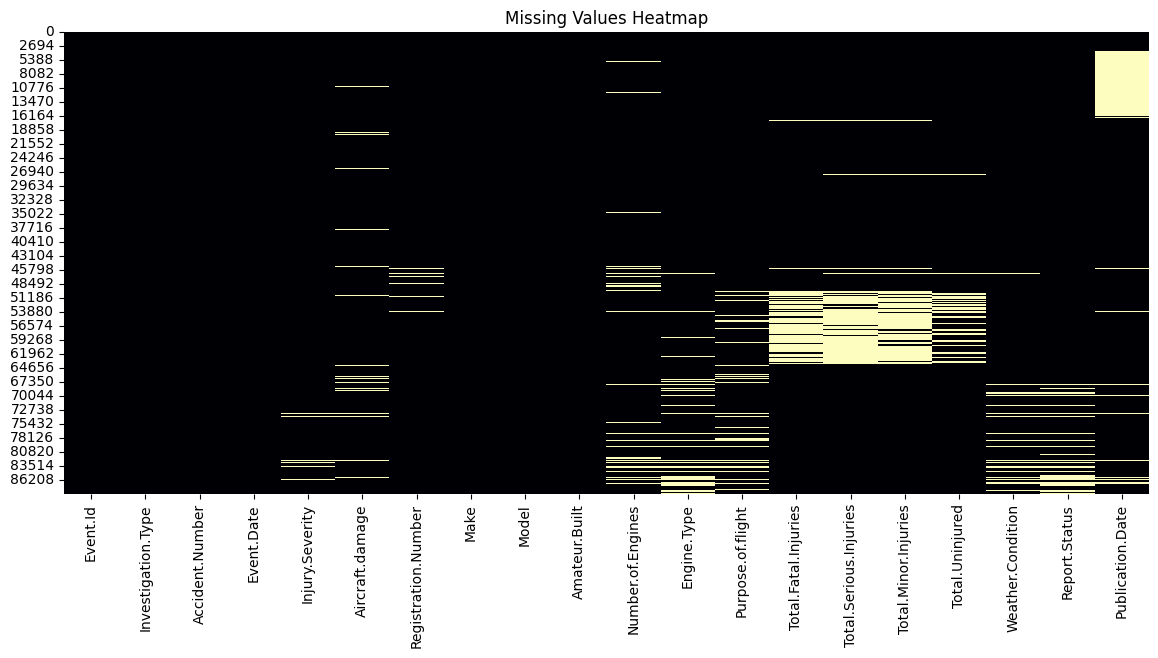

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

## Filling remaining values with forward fill

In [9]:
data = df.fillna(method='ffill')

<ipython-input-9-8c21be8192a7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


## Verifying missing after cleaning

In [10]:
print("\nMissing Values after cleaning:\n", data.isnull().sum().sum())


Missing Values after cleaning:
 1


## Check final data shape

In [11]:
df.shape

(88889, 20)

I dropped irrelevant columns and handled missing data appropriately to maintain focus on aircraft safety factors, ensuring a clean dataset for analysis.

# Exploratory Data Analysis(EDA)

I used exploratory data analysis (EDA) with groupings, aggregations, and visualizations to uncover trends related to aircraft safety. This descriptive approach was appropriate because the project focused on identifying safer aircraft models, not predictive modeling.

## Top 10 Aircraft Manufacturers

### Analyze aircraft manufacturer accident counts

In [12]:
manufacturer_counts = df['Make'].value_counts().head(10)

<ipython-input-13-b9eddfef0f59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index, palette='viridis')


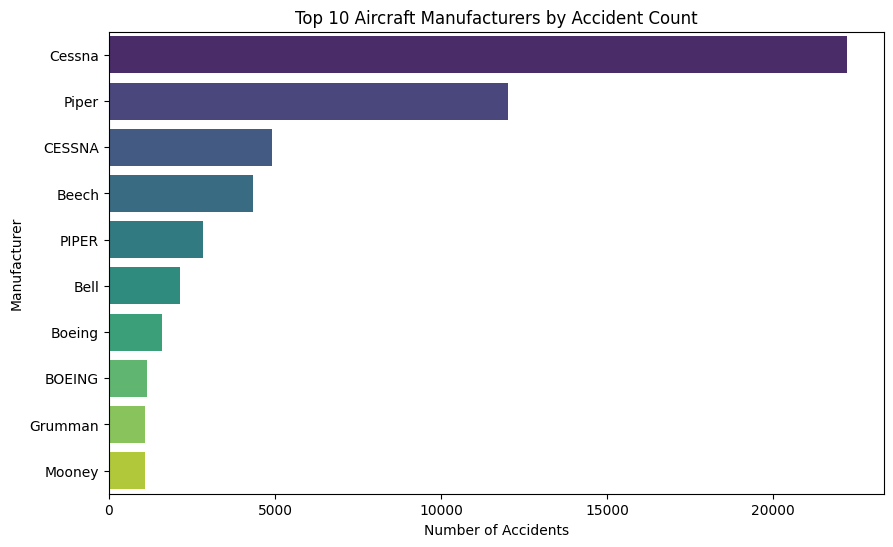

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index, palette='viridis')
plt.title('Top 10 Aircraft Manufacturers by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Manufacturer')
plt.show()

## Accidents by the number of engines in the aircraft

## Analyze the number of engines by the aircraft

In [14]:
engine_data = df[['Number.of.Engines', 'Total.Fatal.Injuries']]
engine_accident_counts = engine_data.groupby('Number.of.Engines').size().reset_index(name='Accident_Count')
engine_accident_counts = engine_accident_counts.sort_values(by='Accident_Count', ascending=False)
engine_accident_counts['Engine_Risk_Level'] = engine_accident_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')


print(engine_accident_counts)

   Number.of.Engines  Accident_Count Engine_Risk_Level
1                1.0           69582         High Risk
2                2.0           11079         High Risk
0                0.0            1226         High Risk
3                3.0             483         High Risk
4                4.0             431         High Risk
6                8.0               3          Low Risk
5                6.0               1          Low Risk


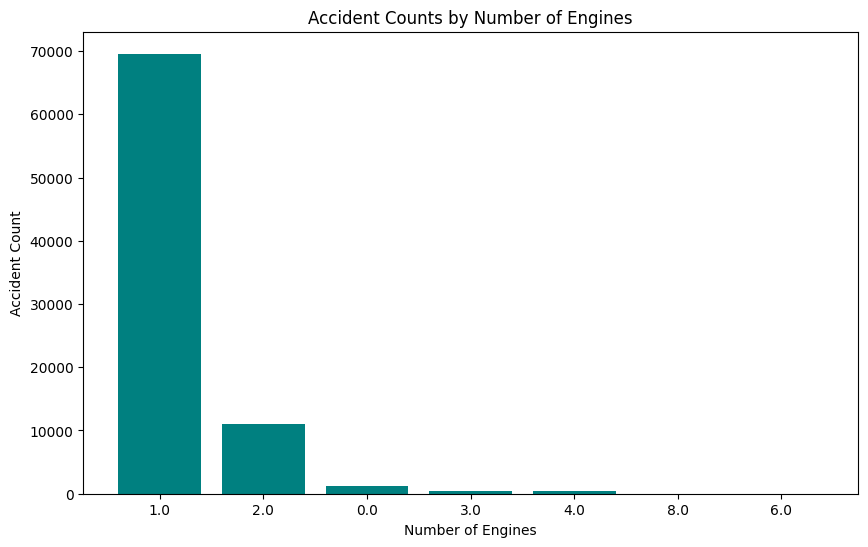

In [15]:
plt.figure(figsize=(10,6))
plt.bar(engine_accident_counts['Number.of.Engines'].astype(str), engine_accident_counts['Accident_Count'], color='teal')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.title('Accident Counts by Number of Engines')
plt.show()

## Injury Severity Distribution

### Analyze injury severity

In [16]:
injury_counts = df['Injury.Severity'].value_counts()

<ipython-input-17-68a949998212>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='coolwarm')


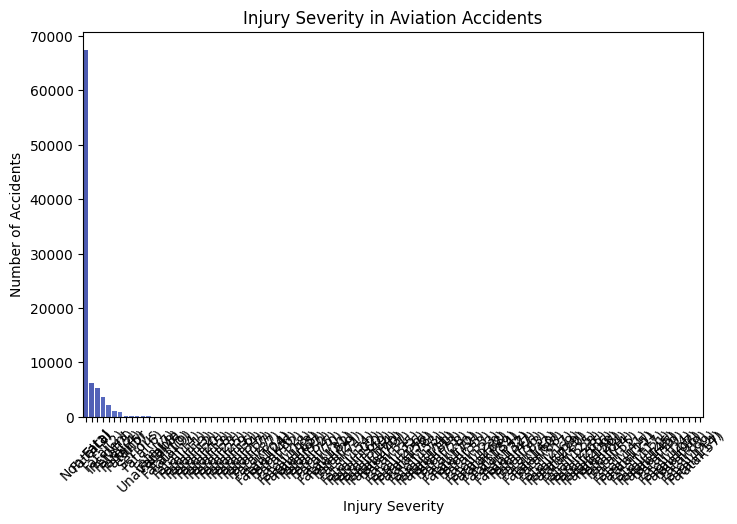

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='coolwarm')
plt.title('Injury Severity in Aviation Accidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix

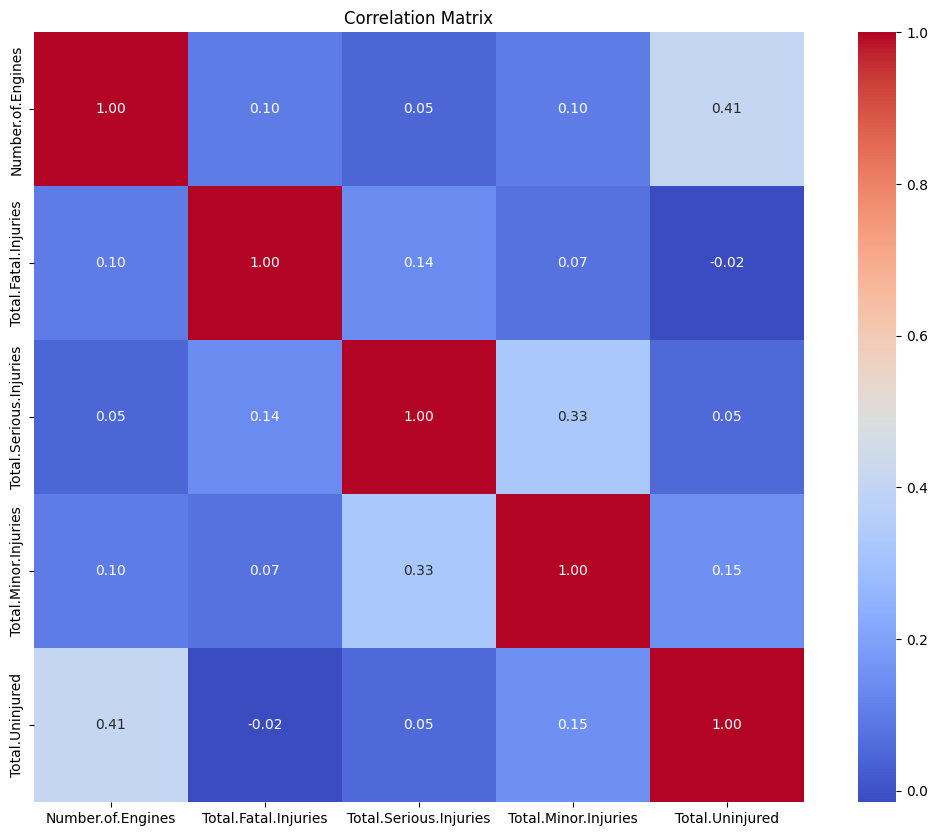

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    plt.figure(figsize=(14,10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric data available for correlation heatmap.")

# Evaluation

The analysis successfully identified safer aircraft manufacturers and revealed that planes with fewer engines are linked to less severe accidents.
Since this was a descriptive analysis, evaluation focused on how well the insights addressed business questions and supported risk-aware decision-making.

# Recommendations

1. Focus investments on aircraft models built by manufacturers who show consistently low numbers of accidents and incidents over time. This will help minimize operational risks and reduce potential insurance and maintenance costs.

2. Aircraft with fewer engines typically have simpler mechanical systems, which can reduce the risk of technical failure and lower long-term maintenance costs—making them a safer and more cost-effective option.

3. Focusing on aircraft with less severe accident outcomes can protect both company reputation and financial stability.

# Conclusion

This project provided valuable insights into aviation risks by analyzing historical accident data. The findings highlight safer manufacturers and show that aircraft with fewer engines may be linked to less severe outcomes, supporting safer investment decisions. While based on historical data, these insights offer a strong foundation, and future work should incorporate more recent safety data to refine recommendations as the business grows.

# Save cleaned Data

In [19]:
data.to_csv('/content/sample_data/Cleaned_AviationData.csv', index=False)

print("\nCleaned dataset saved successfully!")


Cleaned dataset saved successfully!
